### This code compares the biochemical changes in samples exposed to cosmic radiations in-flights, post-flight and a combination of both. This assumption was made to see biochemical trends which are dependent of post flight environment and compare them with recovery if any on returning to earth. Combining both data give a general biochemical trend of all samples exposed to cosmic rays.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('All_strain.xlsx')
# df

### Inflight vs Post-flight

In [4]:
# In-flight
di = df[df['Return_Days'] < 1]
# di

In [5]:
# Post-flight
dp = df[df['Return_Days'] > 0]
# dp

In [29]:
# All data

# Function to compute mean and SEM for a given column index
def compute_stats(df, col_index):
    col_data = df.iloc[:, col_index]
    non_zero = col_data[col_data != 0]
    if not non_zero.empty:
        return non_zero.mean(), non_zero.sem()
    else:
        return 0, 0  # Or `None` if preferred

# Indices for Mitochondria, Central Metabolism, Immunity
col_indices = [10, 25, 37]

# Compute stats
means = []
sems = []

for idx in col_indices:
    mean, sem = compute_stats(df, idx)
    means.append(mean)
    sems.append(sem)

# Final output
print("Mean_all =", means)
print("SEM_all  =", sems)

Mean_all = [np.float64(-0.6511627906976745), np.float64(0.3896930212307692), np.float64(0.2611461745777778)]
SEM_all  = [np.float64(0.11402659336698033), np.float64(0.11246956095728337), np.float64(0.10029274785052633)]


In [30]:
# In-flight

# Function to compute mean and SEM for a given column index
def compute_stats(di, col_index):
    col_data = di.iloc[:, col_index]
    non_zero = col_data[col_data != 0]
    if not non_zero.empty:
        return non_zero.mean(), non_zero.sem()
    else:
        return 0, 0  # Or `None` if preferred

# Indices for Mitochondria, Central Metabolism, Immunity
col_indices = [10, 25, 37]

# Compute stats
means_i = []
sems_i = []

for idx in col_indices:
    mean_, sem_ = compute_stats(di, idx)
    means_i.append(mean_)
    sems_i.append(sem_)

# Final output
print("Mean_in =", means_i)
print("SEM_in  =", sems_i)

Mean_in = [np.float64(-0.47619047619047616), np.float64(0.41640777469230766), np.float64(0.3958035827727272)]
SEM_in  = [np.float64(0.1780979370313436), np.float64(0.1601526326973849), np.float64(0.14490773171569238)]


In [31]:
# Post-flight

# Function to compute mean and SEM for a given column index
def compute_stats(dp, col_index):
    col_data = dp.iloc[:, col_index]
    non_zero = col_data[col_data != 0]
    if not non_zero.empty:
        return non_zero.mean(), non_zero.sem()
    else:
        return 0, 0  # Or `None` if preferred

# Indices for Mitochondria, Central Metabolism, Immunity
col_indices = [10, 25, 37]

# Compute stats
means_p = []
sems_p = []

for idx in col_indices:
    mean_, sem_ = compute_stats(dp, idx)
    means_p.append(mean_)
    sems_p.append(sem_)

# Final output
print("Mean_post =", means_p)
print("SEM_post  =", sems_p)

Mean_post = [np.float64(-0.8181818181818182), np.float64(0.3629782677692308), np.float64(0.13234343630434778)]
SEM_post  = [np.float64(0.14349327082527924), np.float64(0.15868366154269628), np.float64(0.1386160909847112)]


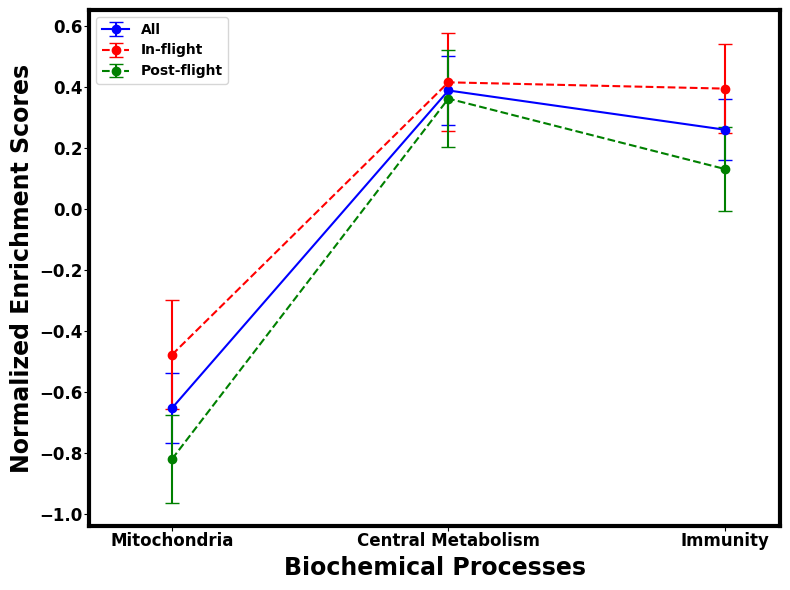

In [25]:
# Line plot with standard error of mean for all samples compared
Bio_Sys = ['Mitochondria','Central Metabolism', 'Immunity']
En = np.arange(len(Bio_Sys))

Mean_All = np.array(means)
SEM_All = np.array(sems)

Mean_In = np.array(means_i)
SEM_In = np.array(sems_i)

Mean_Post = np.array(means_p)
SEM_Post = np.array(sems_p)


# Create subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot with error bars and caps
ax.errorbar(En, Mean_All, yerr=SEM_All, fmt='o-', capsize=5, color='blue', label = "All")
ax.errorbar(En, Mean_In, yerr=SEM_In, fmt='o', linestyle='--', capsize=5, color='red', label = "In-flight")
ax.errorbar(En, Mean_Post, yerr=SEM_Post, fmt='o', linestyle='--', capsize=5, color='green', label = "Post-flight")


ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)

# Axis settings
ax.set_xticks(En)
ax.set_xticklabels(Bio_Sys)
ax.set_ylabel('Normalized Enrichment Scores', fontsize = 17.0)
ax.set_xlabel('Biochemical Processes', fontsize = 17.0)
plt.tick_params(labelsize=12, pad=1)
plt.xlim(-0.3, 2.2)
ax.legend()

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.tight_layout()
plt.savefig('Biochemical_Processes_Lines.svg',format='svg', dpi=600, transparent=False)
plt.show()

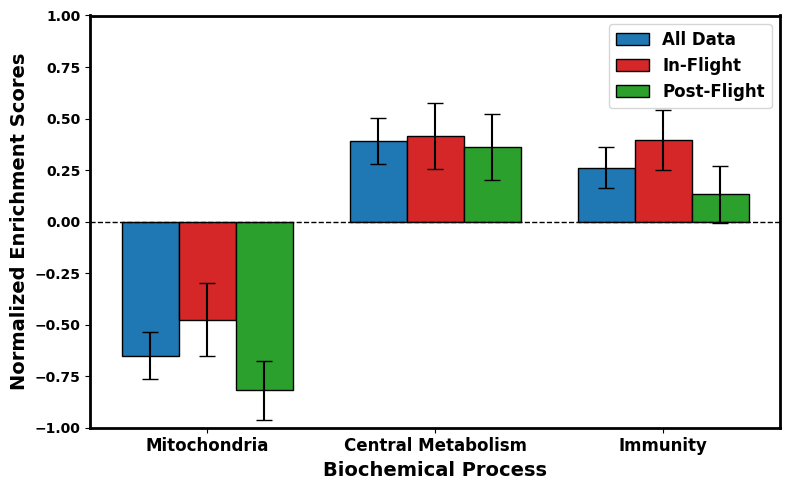

In [32]:
# Bar plot with standard error of mean for all samples compared

labels = ['Mitochondria','Central Metabolism','Immunity']
x = np.arange(len(labels))

# Means & SEMs
means = {
    'All Data': np.array(means),
    'In-Flight': np.array(means_i),
    'Post-Flight': np.array(means_p)
}
sems = {
    'All Data': np.array(sems),
    'In-Flight': np.array(sems_i),
    'Post-Flight': np.array(sems_p)
}

width   = 0.25
offsets = {'All Data': -width, 'In-Flight': 0, 'Post-Flight': width}
colors  = {'All Data':'tab:blue','In-Flight':'tab:red','Post-Flight':'tab:green'}

fig, ax = plt.subplots(figsize=(8,5))
for name in means:
    ax.bar(
        x + offsets[name],
        means[name],
        width=width,
        yerr=sems[name],
        capsize=6,
        label=name,
        color=colors[name],
        edgecolor='black'
    )

ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, fontweight='bold')
ax.set_ylim(-1, 1)
ax.set_xlabel('Biochemical Process', fontsize=14, fontweight='bold')
ax.set_ylabel('Normalized Enrichment Scores', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=12)
for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"
plt.tight_layout()
plt.savefig('Biochemical_Processes_Bars.svg',format='svg', dpi=600, transparent=False)
plt.show()
